In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import beta
import math
%matplotlib inline

In [42]:
alpha = 2.5
beta_param = 4.5
dist = beta(alpha, beta_param)

In [43]:
x = 0.6
pdf_value = dist.pdf(x)
print(f'PDF в точке {x}: {pdf_value}')


PDF в точке 0.6: 0.875969306839718


In [44]:
cdf_value = dist.cdf(x)
print(f'CDF в точке {x}: {cdf_value}')


CDF в точке 0.6: 0.9072819965517553


In [45]:
random_sample = dist.rvs(100)
print(f'Случайные числа: {random_sample}')


Случайные числа: [0.44014823 0.47680648 0.64740462 0.58674399 0.34571958 0.29061298
 0.43993289 0.29123265 0.41076806 0.33146841 0.27075482 0.28864489
 0.06021879 0.52407477 0.28988866 0.17914782 0.34590702 0.1871166
 0.22732825 0.1336782  0.4573771  0.2986732  0.31191761 0.28672919
 0.52301745 0.12556926 0.18268192 0.24832726 0.33119143 0.44111456
 0.52984163 0.59678655 0.32114898 0.27815903 0.56832446 0.20675402
 0.59622777 0.53448591 0.26220011 0.13144348 0.28477451 0.25831211
 0.36211588 0.54946511 0.25084333 0.13216106 0.4187163  0.43490463
 0.48921156 0.49450403 0.28536579 0.27846282 0.39391043 0.46694761
 0.33083327 0.33284267 0.4445726  0.67256473 0.41708848 0.15651608
 0.58857031 0.66764187 0.38958287 0.47767651 0.24930274 0.37789432
 0.39082355 0.53067505 0.61384929 0.3961883  0.30510175 0.5390597
 0.50211869 0.50508841 0.20949822 0.13074873 0.32148116 0.1867843
 0.39471147 0.27792418 0.41033963 0.64729183 0.30423853 0.5808062
 0.28402587 0.49524578 0.17277786 0.29451475 0.11

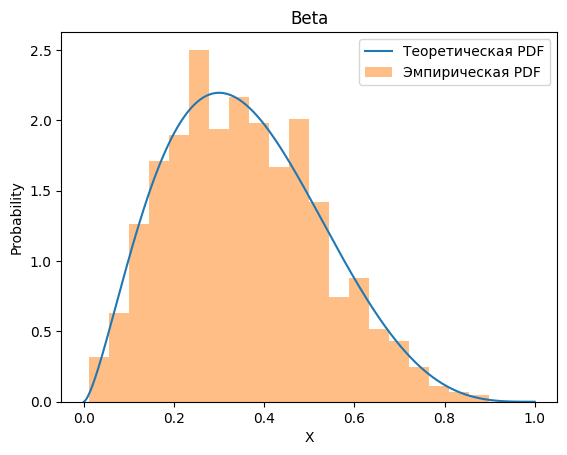

In [98]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

# Указываем параметры альфа (alpha) и бета (beta)
alpha = 2.5
beta_param = 4.5

# Создаем объект распределения
dist = beta(alpha, beta_param)

# Генерация значений для визуализации
x_values = np.linspace(0, 1, 1000)
pdf_curve = dist.pdf(x_values)

# Генерация случайных чисел для эмпирической плотности
random_sample = dist.rvs(size=1000)

# Построение графика
plt.plot(x_values, pdf_curve, label='Теоретическая PDF')
plt.hist(random_sample, density=True, alpha=0.5, bins=20, label='Эмпирическая PDF')

plt.title('Beta')
plt.xlabel('X')
plt.ylabel('Probability')
plt.legend()
plt.show()


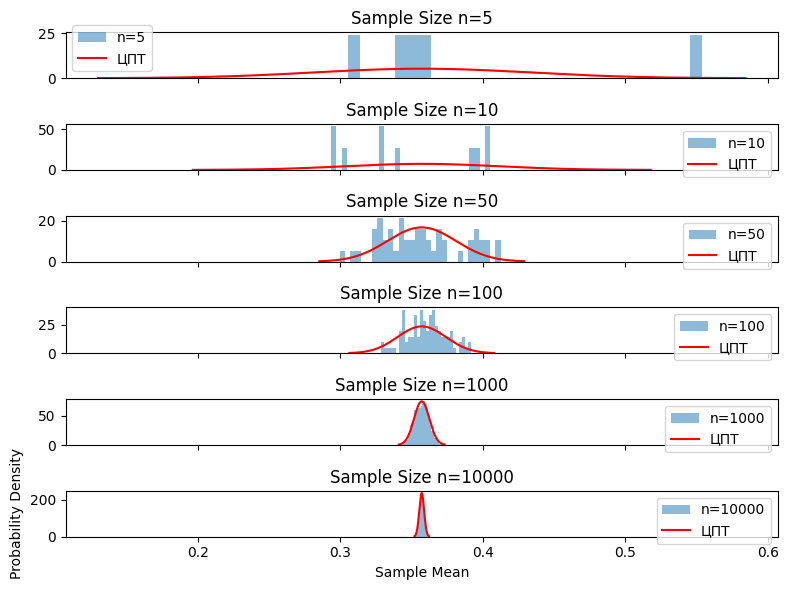

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Параметры бета-распределения
alpha = 2.5
beta_param = 4.5

# Размер выборки
sample_sizes = [5 , 10, 50, 100, 1000, 10000]

# Создаем объект распределения
dist = beta(alpha, beta_param)

# Задаем параметры для нормального распределения по ЦПТ
mu = dist.mean()
sigma = np.sqrt(dist.var())

# Создаем фигуру
fig, axes = plt.subplots(len(sample_sizes), 1, figsize=(8, 6), sharex=True)

for i, n in enumerate(sample_sizes):

    # Количество повторений для каждого размера выборки
    num_samples = n

    # Генерация выборок и их средних значений
    means = [np.mean(dist.rvs(size=n)) for _ in range(num_samples)]

    # Теоретическое распределение выборочных средних по ЦПТ
    norm_dist = norm(mu, sigma / np.sqrt(n))
    x_values = np.linspace(mu - 3 * (sigma / np.sqrt(n)), mu + 3 * (sigma / np.sqrt(n)), 1000)
    theoretical_pdf = norm_dist.pdf(x_values)

    # Построение гистограммы выборочных средних
    axes[i].hist(means, density=True, alpha=0.5, bins=30, label=f'n={n}')
    
    # Построение теоретического распределения выборочных средних по ЦПТ
    axes[i].plot(x_values, theoretical_pdf, label='ЦПТ', color='red')

    axes[i].legend()
    axes[i].set_title(f'Sample Size n={n}')

plt.xlabel('Sample Mean')
plt.ylabel('Probability Density')
plt.tight_layout()
plt.show()


n = 5,10: При небольшом размере выборки аппроксимация распределения выборочного среднего по ЦПТ может быть недостаточно точной. Гистограмма может значительно отличаться от теоретического распределения.

n = 50,100: С увеличением размера выборки аппроксимация становится более точной, и гистограмма выборочных средних начинает лучше соответствовать теоретическому нормальному распределению по ЦПТ.

n = 1000,10000: При еще большем размере выборки аппроксимация становится еще более точной, и гистограмма выборочных средних теперь очень близка к теоретическому нормальному распределению.

Общий вывод: С увеличением размера выборки точность аппроксимации распределения выборочного среднего улучшается, что соответствует ЦПТ.

In [97]:
import pandas as pd
from statsmodels.stats.weightstats import _zconfint_generic

url ="https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df=pd.read_csv(url)


left_data = df[df['churn'] == 1]['total day calls']
not_left_data = df[df['churn'] == 0]['total day calls']

# Оценка среднего значения и стандартного отклонения
mean_left = left_data.mean()
mean_not_left = not_left_data.mean()
std_left = left_data.std(ddof=1)
std_not_left = not_left_data.std(ddof=1)

# Оценка доверительных интервалов с использованием явной формулы для z-интервала
z_v = 1.96  # для уровня доверия 95%

# Доверительный интервал для ушедших
ci_left_low = mean_left - z_v * (std_left / (len(left_data)**0.5))
ci_left_high = mean_left + z_v * (std_left / (len(left_data)**0.5))

# Доверительный интервал для неушедших
ci_not_left_low = mean_not_left - z_v * (std_not_left / (len(not_left_data)**0.5))
ci_not_left_high = mean_not_left + z_v * (std_not_left / (len(not_left_data)**0.5))

print("Доверительный интервал для total day calls ушедших:", (ci_left_low, ci_left_high))
print("Доверительный интервал для total day calls неушедших:", (ci_not_left_low, ci_not_left_high))

# Оценка доверительных интервалов с использованием функции _zconfint_generic
ci_left = _zconfint_generic(mean_left, std_left / (len(left_data)**0.5), 0.05, 'two-sided')
ci_not_left = _zconfint_generic(mean_not_left, std_not_left / (len(not_left_data)**0.5), 0.05, 'two-sided')

print("Доверительный интервал (функция) для total day calls ушедших:", ci_left)
print("Доверительный интервал (функция) для total day calls неушедших:", ci_not_left)


Доверительный интервал для total day calls ушедших: (99.41062692289533, 103.26018053052083)
Доверительный интервал для total day calls неушедших: (99.55617497470149, 101.0101408147722)
Доверительный интервал (функция) для total day calls ушедших: (99.41066229112079, 103.26014516229537)
Доверительный интервал (функция) для total day calls неушедших: (99.55618833318324, 101.01012745629045)
